In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster
from scipy.spatial import distance

In [82]:
datos=pd.read_csv(r'C:\Users\Dell\Desktop\Ciencia de Datos\Ejercicio Retail\retail.csv', encoding= 'unicode_escape')
#datos2=pd.DataFrame(datos[['InvoiceNo','Quantity','UnitPrice','CustomerID']])
#datos2=pd.DataFrame(datos[['Quantity','UnitPrice','CustomerID']])
datos2=pd.DataFrame(datos[['UnitPrice','CustomerID']])
datos2

,UnitPrice,CustomerID
0,2.55,17850.0
1,3.39,17850.0
2,2.75,17850.0
3,3.39,17850.0
4,3.39,17850.0
...,...,...
541904,0.85,12680.0
541905,2.10,12680.0
541906,4.15,12680.0
541907,4.15,12680.0


In [83]:
datos2.info('verbose')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   UnitPrice   541909 non-null  float64
 1   CustomerID  406829 non-null  float64
dtypes: float64(2)
memory usage: 8.3 MB


In [84]:
datos2=datos2.fillna(0)

In [85]:
d=[]

datos3=datos2.values

for K in range(2,10):
    clf=cluster.KMeans(init='random',n_clusters=K,random_state=0)
    clf.fit(datos3)
    
    clusters=clf.predict(datos3)
    
    p=[]
    for i in range(K):
        p.append(np.sum(distance.cdist(datos3[clusters==i, :],[clf.cluster_centers_[i]],'euclidean')))
    d.append(np.sum(p))

    

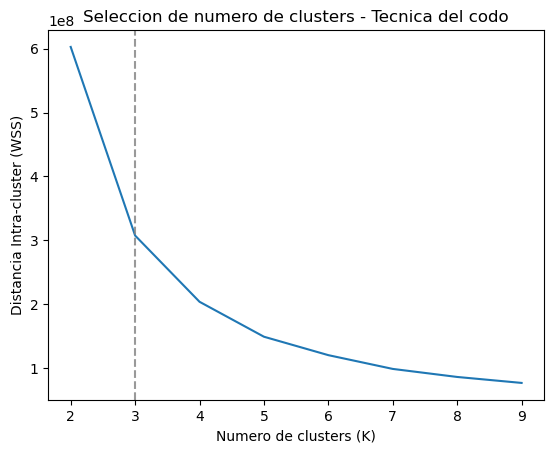

In [86]:
plt.plot(np.arange(2,10),d)
plt.ylabel(u'Distancia Intra-cluster (WSS)')
plt.xlabel(u'Numero de clusters (K)')
plt.title(u'Seleccion de numero de clusters - Tecnica del codo')

plt.axvline(x=3, linestyle='--', c='gray', alpha=0.8)


In [87]:
K=3

clf=cluster.KMeans(init='random',n_clusters=K,random_state=0)

clf.fit(datos2)

clusters=clf.predict(datos2)

centroids=clf.cluster_centers_

print(clf,clusters,centroids,sep='\n\n')


KMeans(init='random', n_clusters=3, random_state=0)

[0 0 0 ... 2 2 2]

[[ 3.15825560e+00  1.68826960e+04]
 [ 8.07657692e+00 -1.50248525e-09]
 [ 3.72071641e+00  1.39141907e+04]]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


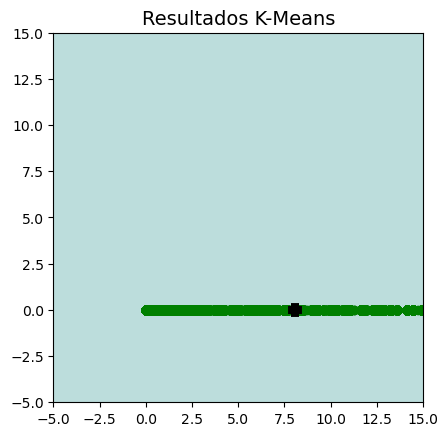

In [88]:
datosfig=datos2.values
fig=plt.plot()
plt.scatter(datosfig[(clusters==0).ravel(),0],datosfig[(clusters==0).ravel(),1],color='b')
plt.scatter(datosfig[(clusters==1).ravel(),0],datosfig[(clusters==1).ravel(),1],color='g')
plt.scatter(datosfig[(clusters==2).ravel(),0],datosfig[(clusters==2).ravel(),1],color='r')

plt.plot(centroids[:,0],centroids[:,1],'k+',linewidth=2,zorder=10,markeredgewidth=10)

plt.title(u'Resultados K-Means',size=14)

x=np.linspace(-5,15,200)
XX,YY=np.meshgrid(x,x)
sz=XX.shape
data=np.c_[XX.ravel(),YY.ravel()]
Z=clf.predict(data)

plt.imshow(Z.reshape(sz),interpolation='bilinear',origin='lower',extent=(-5,15,-5,15),alpha=0.3,vmin=0,vmax=K -1)


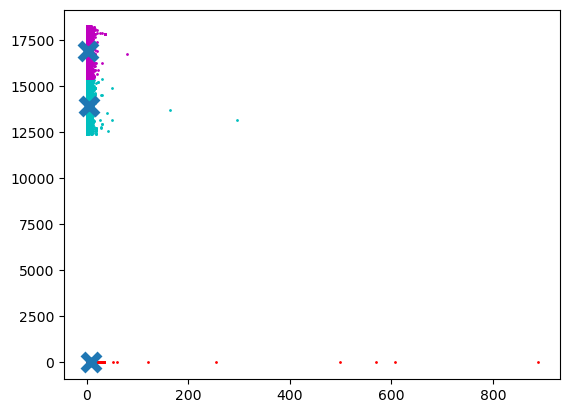

In [95]:
datosfig=datos2.values
colors=['m.','r.','c.']
#for i in range(len(datosfig)):
for i in range(10000):
    #print('Coordenada: ',datosfig[i], ' Label: ', clusters[i])
    plt.plot(datosfig[i][0],datosfig[i][1],colors[clusters[i]],markersize=2)
plt.scatter(centroids[:,0],centroids[:,1],marker='x',s=150,linewidths=5,zorder=10)
plt.show()
